<a href="https://colab.research.google.com/github/harrysharma/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath='/content/drive/MyDrive/AlmaBetter/Python for Data Science/Capston Project/Copy of Telecom Churn.csv'
tele_df=pd.read_csv(filepath)

In [30]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Find area wise churn distribution , plot bar graph corresponding to it.


In [46]:
df1=tele_df[tele_df['Churn']==True].groupby(['State','Churn'],as_index=False).Churn.count()

In [47]:
df1.sort_values(by='Churn')

,State,Churn
0,AK,3
12,IA,3
11,HI,3
3,AZ,4
18,LA,4
29,NE,5
45,VA,5
42,TN,5
7,DC,5
14,IL,5


In [48]:
df1['total_count']=tele_df.groupby('State').State.transform('count')

In [49]:
df1['Churn']=df1['Churn']/df1['total_count']*100

In [50]:
df1.set_index('State',inplace=True)

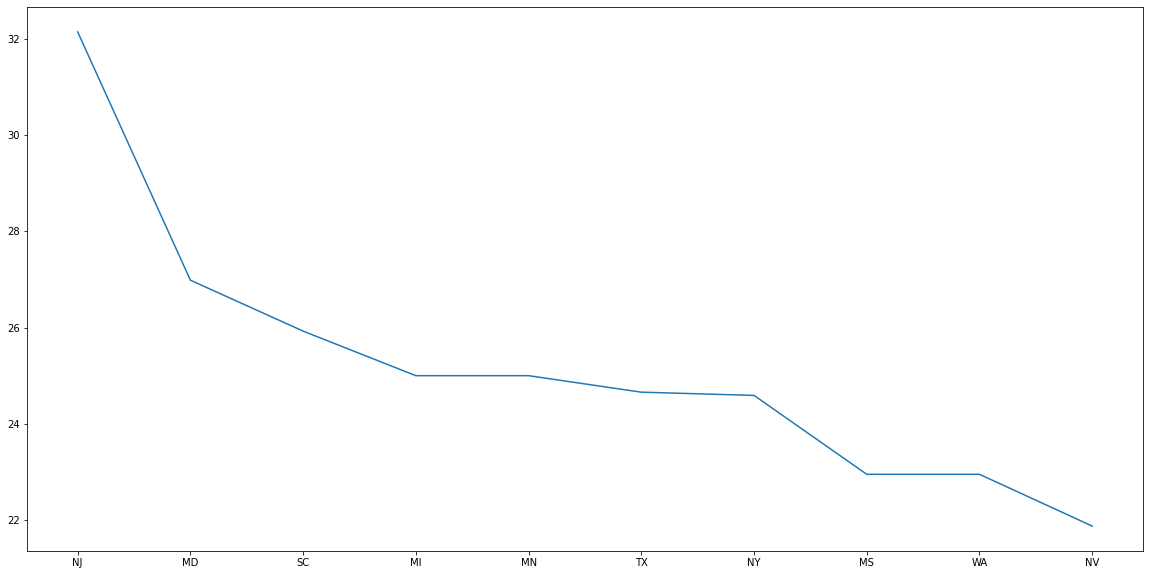

In [51]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(df1[['Churn']].nlargest(10,'Churn'))

In [ ]:
df1.reset_index(inplace=True)

In [69]:
df1.sort_values(by='Churn',ascending=False)
top10_state=df1.nlargest(10,'Churn')['State']

State  - TX,NJ-18 has heighest churn value   following that MD-17,MI-16,NY-15

Text(0, 0.5, 'Churn Customer Count (%)')

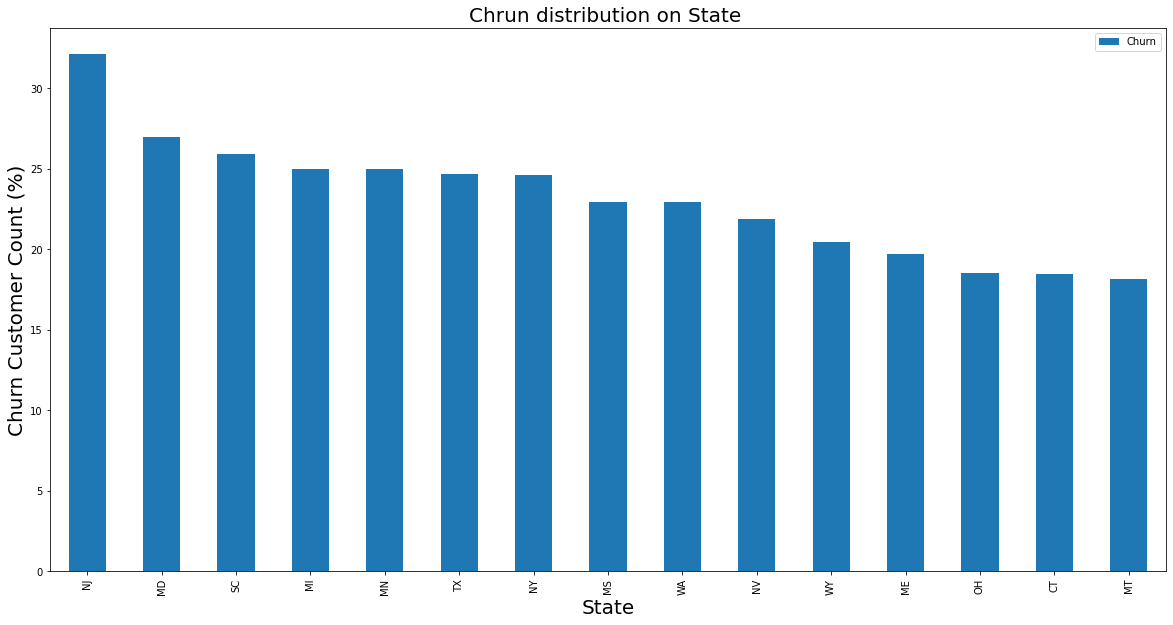

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
# plt.plot(df1.nlargest(15,'Churn'))

df1[['Churn']].nlargest(15,'Churn').plot(kind='bar')
plt.title('Chrun distribution on State ', fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Churn Customer Count (%)',fontsize=20)

In [183]:
tele_df['churn_count']=tele_df[tele_df['Churn']==True].groupby(['State']).Churn.transform('count')

In [184]:
df3=tele_df[['State','churn_count']].drop_duplicates()

In [185]:
df3.sort_values(by='churn_count',ascending=False)

,State,churn_count
89,NJ,18.0
69,TX,18.0
41,MD,17.0
502,MI,16.0
15,NY,15.0
...,...,...
136,NY,NaN
196,TN,NaN
212,PA,NaN
290,CT,NaN


In [186]:
df4=tele_df[tele_df['Churn']==True].groupby(['State','Area code'])['Churn'].count()

Text(0, 0.5, 'Churn Customer Count')

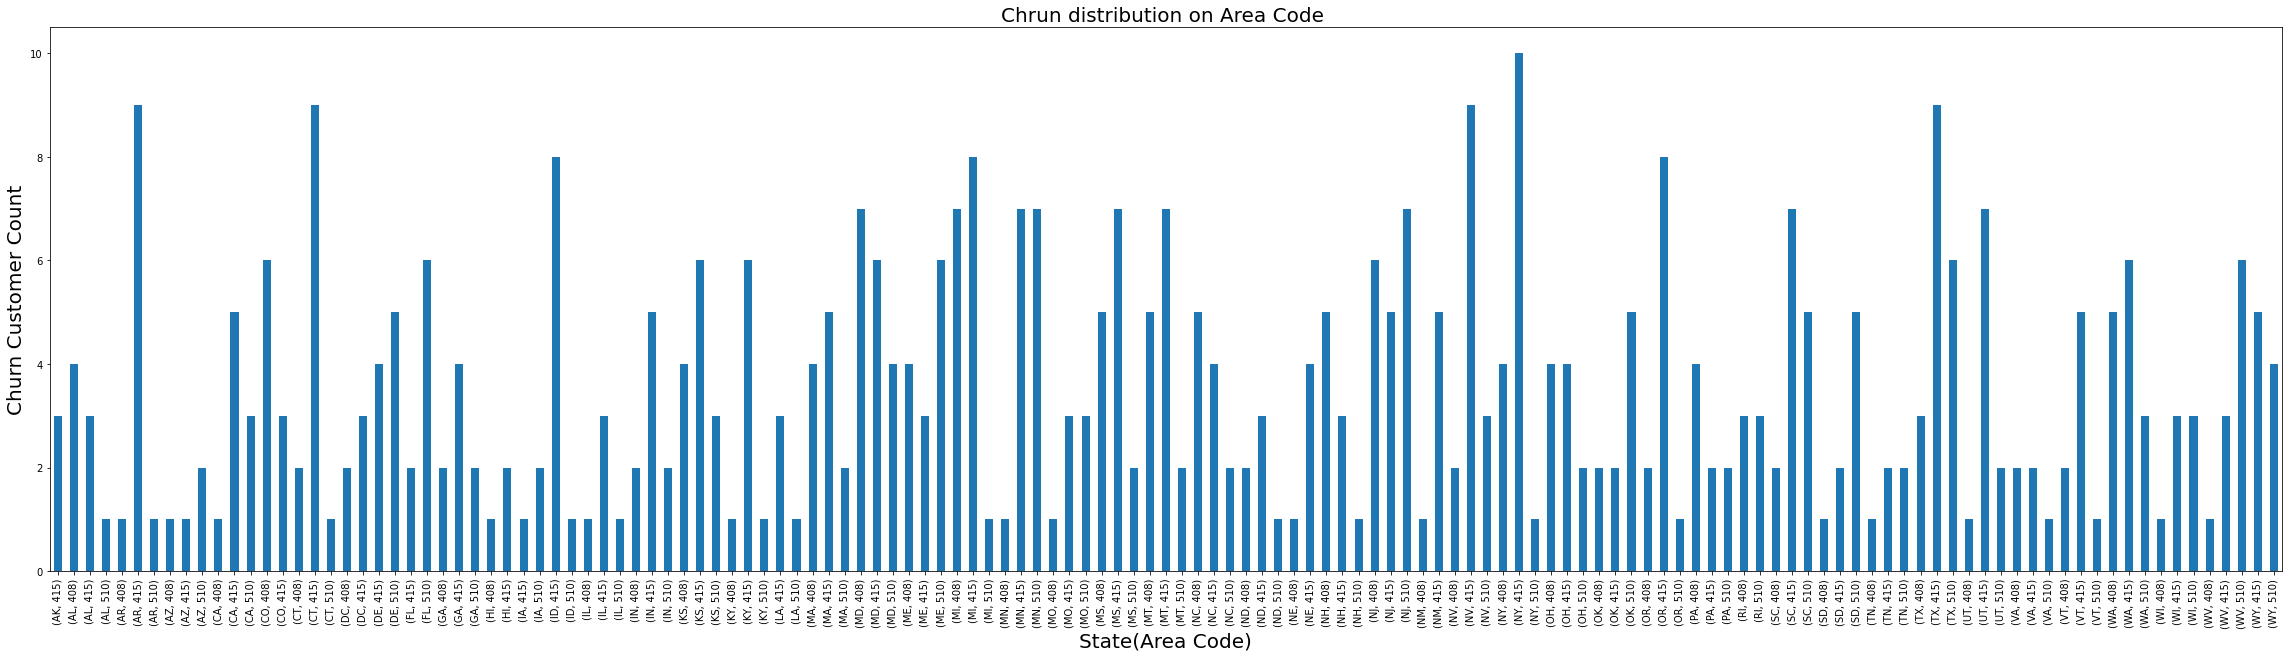

In [187]:
plt.rcParams['figure.figsize'] = (40, 10)
df4.plot(kind='bar')
plt.title('Chrun distribution on Area Code ', fontsize=20)
plt.xlabel('State(Area Code)',fontsize=20)
plt.ylabel('Churn Customer Count',fontsize=20)

# Charge per minute of Churn and non  Churn Customer

In [ ]:
tele_df['charge_per_min_day'] =tele_df['Total day charge']/tele_df['Total day minutes']
tele_df['charge_per_min_eve'] =tele_df['Total eve charge']/tele_df['Total eve minutes']
tele_df['charge_per_min_night'] =tele_df['Total night charge']/tele_df['Total night minutes']

In [ ]:
For non churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==False]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==False]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==False]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000331531507384 0.08500123332733626 0.0450003662063208


In [ ]:
#For Churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==True]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==True]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==True]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000275572453427 0.08500081707432333 0.0450002247152355


In [ ]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# **There is no difference between charge per minute for churn and non churn customer**

In [ ]:
df1 = tele_df[['Churn','State','Account length','Total day calls']]
# df2=pd.MultiIndex.from_frame(pd.DataFrame([df1['State'].unique().tolist(), df1['Churn'].unique().tolist()],
#            )

In [ ]:
df1.groupby(['Churn','State','Account length'])['Total day calls'].count()

KeyError: ignored

In [ ]:
df2

10       65
15      161
21       77
33       12
41      135
       ... 
3301     84
3304     71
3320    122
3322     62
3323    117
Name: Account length, Length: 483, dtype: int64

In [ ]:
pd.crosstab(tele_df['Churn'], tele_df['Account length'], margins = True)


Account length,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,191,192,193,194,195,196,197,199,200,201,202,204,205,208,209,210,212,215,217,221,224,225,232,243,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,7,0,5,1,1,2,2,1,3,3,4,2,8,3,7,2,2,4,3,7,6,2,5,4,1,8,5,4,8,7,7,9,6,8,13,11,8,6,6,13,...,1,6,7,2,5,4,4,4,5,3,6,2,0,6,7,1,3,3,3,2,2,2,1,1,2,1,2,2,0,2,2,1,1,2,1,1,1,1,1,2850
True,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,1,0,1,0,2,3,1,0,1,1,1,0,0,0,1,1,1,1,2,1,1,3,1,...,0,0,2,1,1,1,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,483
All,8,1,5,1,1,2,2,1,3,3,4,3,9,3,8,4,2,5,3,8,6,4,8,5,1,9,6,5,8,7,7,10,7,9,14,13,9,7,9,14,...,1,6,9,3,6,5,5,6,5,4,6,2,1,6,7,1,3,4,3,2,2,3,1,1,3,1,2,2,1,3,2,2,1,2,1,2,2,1,1,3333


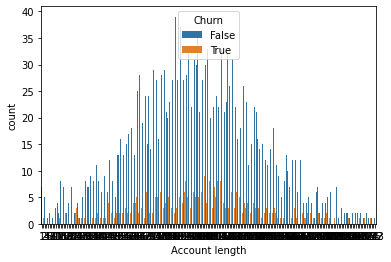

In [25]:
sns.countplot(x = 'Account length', hue = 'Churn', data = tele_df)


# **Analysing top 10 states**

In [71]:
top10_state=top10_state.tolist()

In [193]:
df1=tele_df[tele_df['State'].isin(top10_state)]
df1['area_total_churn']=df1.groupby(['State','Area code'])['Churn'].transform('count')
df1['AWCT_count']=df1[df1['Churn']==True].groupby(['State','Area code','Churn'])['Churn'].transform('count')
df1['AWCF_count']=df1[df1['Churn']==False].groupby(['State','Area code','Churn'])['Churn'].transform('count')
df1['AWCT_count%']=df1['AWCT_count']/df1['area_total_churn']*100
df1['AWCF_count%']=df1['AWCF_count']/df1['area_total_churn']*100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [194]:

table = pd.pivot_table(df1,  values=['AWCT_count%','AWCF_count%'] , index=['Area code','State',])

In [195]:

table['AWC_diff']=(table['AWCF_count%']-table['AWCT_count%'])

In [198]:
table

AWCF_count%  AWCT_count%   AWC_diff
Area code State                                     
408       MD       56.250000    43.750000  12.500000
          MI       41.666667    58.333333 -16.666667
          MN       95.000000     5.000000  90.000000
          MS       66.666667    33.333333  33.333333
          NJ       60.000000    40.000000  20.000000
          NV       85.714286    14.285714  71.428571
          NY       78.947368    21.052632  57.894737
          SC       84.615385    15.384615  69.230769
          TX       85.000000    15.000000  70.000000
          WA       78.260870    21.739130  56.521739
415       MD       84.615385    15.384615  69.230769
          MI       79.487179    20.512821  58.974359
          MN       82.500000    17.500000  65.000000
          MS       77.419355    22.580645  54.838710
          NJ       85.294118    14.705882  70.588235
          NV       73.529412    26.470588  47.058824
          NY       78.723404    21.276596  57.446809
          SC       76.666667    23.333333  53.333333
          TX       75.675676    24.324324  51.351351
          WA       76.923077    23.076923  53.846154
510       MD       73.333333    26.666667  46.666667
          MI       95.454545     4.545455  90.909091
          MN       70.833333    29.166667  41.666667
          MS       89.473684    10.526316  78.947368
          NJ       63.157895    36.842105  26.315789
          NV       83.333333    16.666667  66.666667
          NY       94.117647     5.882353  88.235294
          SC       70.588235    29.411765  41.176471
          TX       60.000000    40.000000  20.000000
          WA       82.352941    17.647059  64.705882

In [1]:
table.groupby('Area code')['AWC_diff'].mean()

NameError: ignored

# **Area code 408 has more number of cases than other two areas**
State MI has maximum number of churn cases in Area 408, so to address the issue we can begin from that area 
Area code 408

1.nj-20%

2.md-15%

4.mi-(-15%)


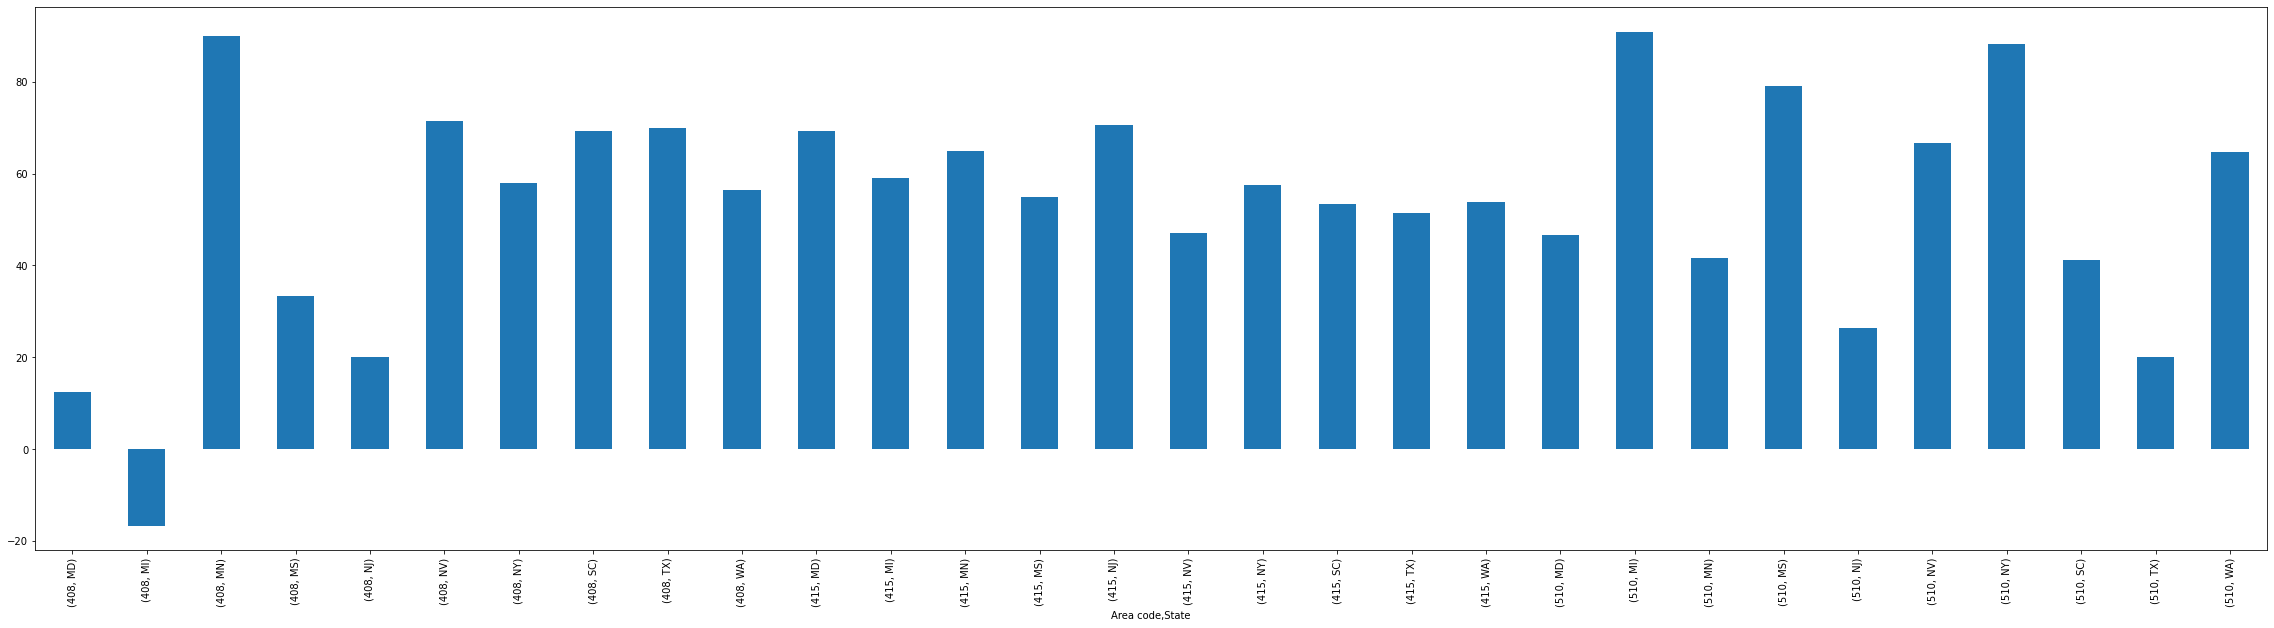

In [197]:
(table['AWCF_count%']-table['AWCT_count%']).plot(kind='bar')

In [5]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
pd.crosstab(tele_df[tele_df['Churn']==True]['Voice mail plan'],tele_df[tele_df['Churn']==True]['Number vmail messages'],margins=True)

Number vmail messages,0,15,16,17,18,19,20,21,22,24,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,44,45,48,All
Voice mail plan,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,403
Yes,0,1,1,1,2,1,2,2,2,1,6,3,6,8,2,5,6,6,2,4,4,2,1,1,3,4,2,1,1,80
All,403,1,1,1,2,1,2,2,2,1,6,3,6,8,2,5,6,6,2,4,4,2,1,1,3,4,2,1,1,483


# **-------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [11]:
tdf1=tele_df

In [12]:
tdf1.rename(columns={ 'Account length':'acc_length', 'Area code':'area_code', 'International plan':'intl_plan',
       'Voice mail plan':'voice_mail_plan', 'Number vmail messages':'num_vmail_msg', 'Total day minutes':'ttl_day_min',
       'Total day calls':'ttl_day_calls', 'Total day charge':'ttl_day_chrg', 'Total eve minutes':'ttl_eve_min',
       'Total eve calls':'ttl_eve_calls', 'Total eve charge':'ttl_eve_chrg', 'Total night minutes':'ttl_nyt_min',
       'Total night calls':'ttl_nyt_calls', 'Total night charge':'ttl_nyt_chrg', 'Total intl minutes':'ttl_intl_min',
       'Total intl calls':'ttl_intl_calls', 'Total intl charge':'ttl_intl_chrg', 'Customer service calls':'cust_servc_calls'},inplace=True)

In [23]:
type(tdf1['cust_servc_calls'][0])

numpy.int64

In [27]:
tdf1[( tdf1['Churn']==True) & (tdf1['cust_servc_calls'] > 3)]

,State,acc_length,area_code,intl_plan,voice_mail_plan,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [247]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3333 non-null   object 
 1   acc_length        3333 non-null   int64  
 2   area_code         3333 non-null   int64  
 3   intl_plan         3333 non-null   object 
 4   voice_mail_plan   3333 non-null   object 
 5   num_vmail_msg     3333 non-null   int64  
 6   ttl_day_min       3333 non-null   float64
 7   ttl_day_calls     3333 non-null   int64  
 8   ttl_day_chrg      3333 non-null   float64
 9   ttl_eve_min       3333 non-null   float64
 10  ttl_eve_calls     3333 non-null   int64  
 11  ttl_eve_chrg      3333 non-null   float64
 12  ttl_nyt_min       3333 non-null   float64
 13  ttl_nyt_calls     3333 non-null   int64  
 14  ttl_nyt_chrg      3333 non-null   float64
 15  ttl_intl_min      3333 non-null   float64
 16  ttl_intl_calls    3333 non-null   int64  


In [251]:
# sns.countplot(x = 'ttl_day_calls', hue = 'ttl_day_min', data = tdf1)

In [266]:
tdf_CT=tdf1[tdf1['Churn']==True]

In [267]:
tdf_CF=tdf1[tdf1['Churn']==False]

In [268]:
tdf_CT.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [269]:
tdf_CF.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


In [270]:
#                   acc_length	area_code	  num_vmail_msg	  ttl_day_min	 ttl_day_calls	ttl_day_chrg	ttl_eve_min	  ttl_eve_calls	 ttl_eve_chrg	 ttl_nyt_min	ttl_nyt_calls	 ttl_nyt_chrg	 ttl_intl_min	 ttl_intl_calls	 ttl_intl_chrg	cust_servc_calls

# mean_churn False	100.793684	437.074737	8.604561	      175.175754	 100.283158	    29.780421	    199.043298	  100.038596	   16.918909	   200.133193	   100.058246	   9.006074	     10.158877	   4.532982	       2.743404	       1.449825

# mean_churn True 	102.664596	437.817805	5.115942	      206.914079	 101.335404	    35.175921	    212.410145	  100.561077	   18.054969	   205.231677	   100.399586	    9.235528	   10.70000	     4.163561	       2.889545	       2.229814


Observtion from above data:-

1.Churning customer are facing higher day call charges then other timelines ----not

2.they are making more day calls then other timeline (in number of calls)

3.their call duration for daytime is more as compare to other timeline (in minutes)

4.loyal customer prefer voice mail more than churning customer(when network is busy)

(array([ 14.,  67., 201., 479., 798., 812., 594., 264.,  84.,  20.]),
 array([  0.  ,  35.08,  70.16, 105.24, 140.32, 175.4 , 210.48, 245.56,
        280.64, 315.72, 350.8 ]),
 <a list of 10 Patch objects>)

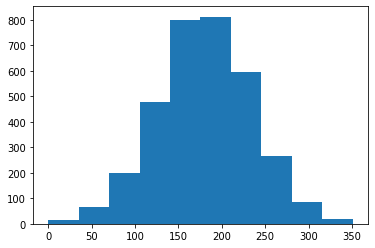

In [13]:
plt.hist(tdf1['ttl_day_min'])

(array([  2.,  21.,  87., 339., 742., 932., 716., 375.,  98.,  21.]),
 array([  0.  ,  36.37,  72.74, 109.11, 145.48, 181.85, 218.22, 254.59,
        290.96, 327.33, 363.7 ]),
 <a list of 10 Patch objects>)

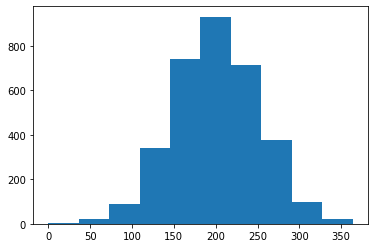

In [14]:
plt.hist(tdf1['ttl_eve_min'])

(array([ 11.,  56., 246., 646., 910., 848., 452., 132.,  26.,   6.]),
 array([ 23.2 ,  60.38,  97.56, 134.74, 171.92, 209.1 , 246.28, 283.46,
        320.64, 357.82, 395.  ]),
 <a list of 10 Patch objects>)

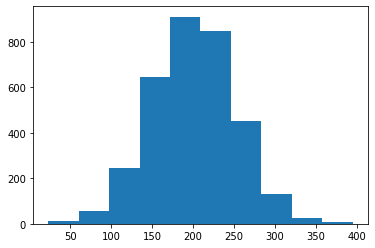

In [15]:
plt.hist(tdf1['ttl_nyt_min'])

(array([ 11.,  25.,  58.,  83., 114., 102.,  45.,  32.,   8.,   5.]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <a list of 10 Patch objects>)

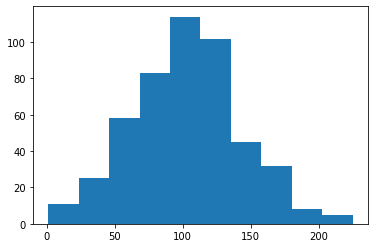

In [17]:
plt.hist(tdf1[tdf1['Churn']==True]['acc_length'])

(array([ 84., 200., 433., 626., 647., 493., 244.,  95.,  23.,   5.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 10 Patch objects>)

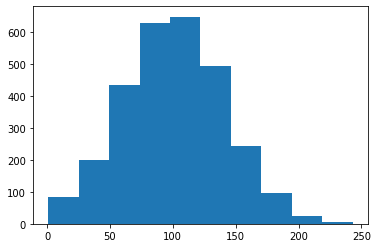

In [18]:
plt.hist(tdf1[tdf1['Churn']==False]['acc_length'])

(array([ 12.,  45., 116., 295., 557., 644., 671., 352., 135.,  23.]),
 array([  0.  ,  31.56,  63.12,  94.68, 126.24, 157.8 , 189.36, 220.92,
        252.48, 284.04, 315.6 ]),
 <a list of 10 Patch objects>)

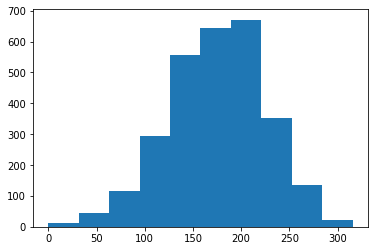

In [19]:
plt.hist(tdf1[tdf1['Churn']==False]['ttl_day_min'])

(array([  2.,  20.,  77., 293., 646., 799., 605., 309.,  84.,  15.]),
 array([  0.  ,  36.18,  72.36, 108.54, 144.72, 180.9 , 217.08, 253.26,
        289.44, 325.62, 361.8 ]),
 <a list of 10 Patch objects>)

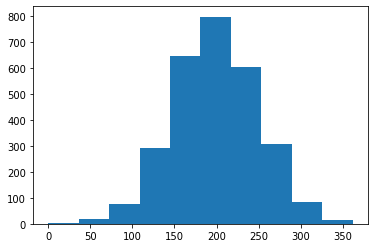

In [20]:
plt.hist(tdf1[tdf1['Churn']==False]['ttl_eve_min'])

In [271]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3333 non-null   object 
 1   acc_length        3333 non-null   int64  
 2   area_code         3333 non-null   int64  
 3   intl_plan         3333 non-null   object 
 4   voice_mail_plan   3333 non-null   object 
 5   num_vmail_msg     3333 non-null   int64  
 6   ttl_day_min       3333 non-null   float64
 7   ttl_day_calls     3333 non-null   int64  
 8   ttl_day_chrg      3333 non-null   float64
 9   ttl_eve_min       3333 non-null   float64
 10  ttl_eve_calls     3333 non-null   int64  
 11  ttl_eve_chrg      3333 non-null   float64
 12  ttl_nyt_min       3333 non-null   float64
 13  ttl_nyt_calls     3333 non-null   int64  
 14  ttl_nyt_chrg      3333 non-null   float64
 15  ttl_intl_min      3333 non-null   float64
 16  ttl_intl_calls    3333 non-null   int64  


In [272]:
tdf1.head()

,State,acc_length,area_code,intl_plan,voice_mail_plan,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [274]:
tdf_CT_VT=tdf_CT[tdf_CT['voice_mail_plan']=='Yes']
tdf_CT_VF=tdf_CT[tdf_CT['voice_mail_plan']=='No']

In [275]:
tdf_CF_VF=tdf_CF[tdf_CF['voice_mail_plan']=='No']
tdf_CF_VT=tdf_CF[tdf_CF['voice_mail_plan']=='Yes']

In [276]:
tdf_CF_VF.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,2008.000000,2008.000000,2008.0,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,100.739044,437.228088,0.0,173.188147,100.416335,29.442555,197.485707,100.135956,16.786489,199.290737,99.884960,8.968167,10.164890,4.547809,2.745000,1.460657
std,40.186010,42.457831,0.0,48.561105,19.786981,8.255304,50.273571,20.023552,4.273271,50.759755,19.465663,2.284203,2.797746,2.426951,0.755368,1.154030
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.0,142.400000,87.000000,24.210000,163.600000,87.000000,13.910000,166.275000,87.000000,7.480000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.0,175.700000,100.000000,29.870000,197.500000,100.000000,16.790000,198.450000,100.000000,8.930000,10.200000,4.000000,2.750000,1.000000
75%,128.000000,510.000000,0.0,207.200000,114.000000,35.220000,231.125000,114.000000,19.642500,232.825000,113.000000,10.480000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,0.0,310.400000,160.000000,52.770000,354.200000,164.000000,30.110000,395.000000,166.000000,17.770000,18.900000,19.000000,5.100000,7.000000


In [277]:
tdf_CF_VT.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,100.923990,436.709026,29.124703,179.915796,99.965558,30.586164,202.757838,99.806413,17.234703,202.142280,100.471496,9.096473,10.144537,4.497625,2.739596,1.423990
std,39.172006,41.965074,7.576789,53.583008,19.843082,9.109155,50.171390,19.812121,4.264616,51.894404,19.608105,2.335354,2.754216,2.478563,0.743602,1.187347
min,1.000000,408.000000,4.000000,2.600000,35.000000,0.440000,42.200000,37.000000,3.590000,23.200000,38.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,415.000000,24.000000,143.500000,87.000000,24.400000,167.300000,87.000000,14.220000,165.700000,87.000000,7.460000,8.300000,3.000000,2.240000,1.000000
50%,101.000000,415.000000,29.000000,182.100000,101.000000,30.960000,203.850000,100.000000,17.325000,203.500000,101.000000,9.160000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,415.000000,34.000000,216.750000,113.000000,36.850000,236.575000,113.000000,20.107500,239.850000,113.750000,10.797500,12.000000,6.000000,3.240000,2.000000
max,221.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,381.900000,175.000000,17.190000,17.600000,18.000000,4.750000,8.000000


In [278]:
tdf_CT_VF.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,403.000000,403.000000,403.0,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,102.258065,437.071960,0.0,212.934739,101.354839,36.199355,214.351117,100.481390,18.219876,207.613896,100.091811,9.342829,10.611663,4.069479,2.865707,2.158809
std,40.442981,42.323526,0.0,70.574627,22.166503,11.997781,51.870759,19.738755,4.408785,46.636824,20.107646,2.098766,2.718947,2.436280,0.734194,1.813326
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,51.000000,2.130000,2.000000,1.000000,0.540000,0.000000
25%,75.500000,415.000000,0.0,154.450000,87.000000,26.260000,179.100000,87.000000,15.225000,172.950000,85.500000,7.785000,8.800000,2.000000,2.380000,1.000000
50%,101.000000,415.000000,0.0,228.600000,103.000000,38.860000,214.100000,101.000000,18.200000,208.000000,100.000000,9.360000,10.500000,3.000000,2.840000,2.000000
75%,126.500000,462.500000,0.0,269.750000,117.000000,45.860000,250.950000,113.500000,21.330000,241.200000,115.000000,10.855000,12.500000,5.000000,3.380000,4.000000
max,225.000000,510.000000,0.0,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,18.300000,15.000000,4.940000,9.000000


In [280]:
tdf_CT_VT.count

acc_length          104.712500
area_code           441.575000
num_vmail_msg        30.887500
ttl_day_min         176.585000
ttl_day_calls       101.237500
ttl_day_chrg         30.020375
ttl_eve_min         202.632500
ttl_eve_calls       100.962500
ttl_eve_chrg         17.224250
ttl_nyt_min         193.231250
ttl_nyt_calls       101.950000
ttl_nyt_chrg          8.695000
ttl_intl_min         11.145000
ttl_intl_calls        4.637500
ttl_intl_chrg         3.009625
cust_servc_calls      2.587500
Churn                 1.000000
dtype: float64

In [ ]:
for CHurn false 
                        acc_length	area_code	  num_vmail_msg	  ttl_day_min	 ttl_day_calls	ttl_day_chrg	ttl_eve_min	 ttl_eve_calls	ttl_eve_chrg	ttl_nyt_min	ttl_nyt_calls	ttl_nyt_chrg	ttl_intl_min	ttl_intl_calls	ttl_intl_chrg	cust_servc_calls
vmail plan false --mean	100.739044	437.228088	0.0	            173.188147	 100.416335	    29.442555	    197.485707	 100.135956	    16.786489	    199.290737	99.884960	     8.968167	    10.164890	    4.547809	       2.745000	      1.460657
vmail plan true  --mean	100.923990	436.709026	29.124703	      179.915796	 99.965558	    30.586164	    202.757838	 99.806413	    17.234703	    202.142280	100.471496	   9.096473	    10.144537	    4.497625	       2.739596	      1.423990

for Churn true
vmail plan false --mean	102.258065	437.071960	0.0	            212.934739	 101.354839	     36.199355	  214.351117	 100.481390	    18.219876	    207.613896	 100.091811	   9.342829	     10.611663	  4.069479        	2.865707	     2.158809
vmail plan true  --mean	104.712500	441.575000	30.887500     	176.58500	   101.237500	     30.020375	  202.632500	 100.962500	    17.224250	    193.231250	 101.950000	   8.695000	     11.145000	  4.637500	        3.009625	     2.587500


# **Observation from above data:-**

1. 30% of loyal customer opting for vmail plan

   16% of churning customer opting vmail plan

2. Churning customer having vmail plan has same avg day call time as for loyal customer , but churning customer without vmail plan has more day call time 

3. customer who are churning and not having vmail plans, paying more for day time calls 

4. **International calls** vmail plan user pay more than other and they have more call time then other

5. customer services are not good and not upto standards


In [ ]:
0.loyal customer -86%  churning cust.-14%
1.State wise churning percentage
2.state wise distribution of customer service calls , people who are getting more service calls are leaving
3.percentage of people having international plans for true churners is higher
4.loyal customer prefer voice mail plan more than churning customer
5.vmail message vs churning 
6.